In [14]:
%matplotlib inline

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


In [16]:
# df = pd.DataFrame.from_csv('iris.data.csv',names = ['a','b','c','d','e'], index_col = None)
df = pd.read_csv('iris.data.csv',names = ['s_length','s_width','p_length','p_width','i_class'])

In [17]:
df.head()

,s_length,s_width,p_length,p_width,i_class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


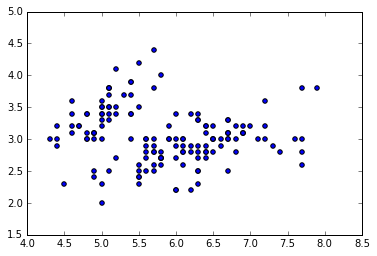

In [18]:
y = df['s_width']
x = df['s_length']
plt.scatter(x,y)

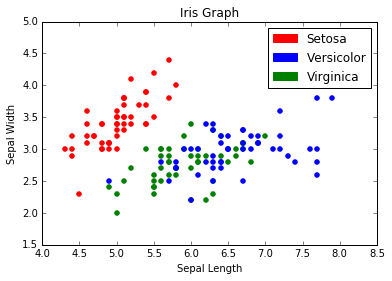

In [19]:
# print(df.i_class.unique())
c_chart = ['red','green','blue']
for idx, val in enumerate(df.i_class.unique()):
    df1 = df[df['i_class'] == val]
    y = df1['s_width']
    x = df1['s_length']
    plt.scatter(x,y, color = c_chart[idx])
plt.title('Iris Graph')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
red_patch = mpatches.Patch(color='red', label='Setosa')
blue_patch = mpatches.Patch(color='blue', label = 'Versicolor')
green_patch = mpatches.Patch(color='green', label = 'Virginica')
plt.legend(handles=[red_patch, blue_patch, green_patch])
plt.show()

In [20]:
# Determine k.
# Calculate the distance between the new observation and all points in the training set.
# Sort the distances to determine the k nearest neighbors based on the k-th minimum distance.
# Determine the class of those neighbors.
# Determine the majority.

In [40]:
# re read the file each time
df = pd.read_csv('iris.data.csv',names = ['s_length','s_width','p_length','p_width','i_class'])
# set k - pick an odd number
k = 5

# Pick a random row
myrnd = np.random.random_integers(1, len(df), 1)
print("Picked row {} at random".format(myrnd))

# make a copy of the randomly selcted row
dfrnd = df.iloc[[myrnd[0]]]
print("Values in my row are as follows")
print(dfrnd)

# set the values for length and width from random row for distance calculations

rnd_length = dfrnd['s_length']
rnd_width = dfrnd['s_width']
print("sepal length in my random row is {}".format(rnd_length))
# type(rnd_length)

# calculate the distance between the random point and all points in the array based on pythagorean thereom

df['length_dif'] = rnd_length.values.item() - df['s_length']
df['width_dif'] = rnd_width.values.item() - df['s_width']
df['dist'] = np.sqrt(df.length_dif **2 + df.width_dif **2)

# sort the data by distance
dfsort = df.sort(['dist'], ascending = [True])


# create a new df with only k nearest neighbors
dfk = dfsort.head(k)
print("nearest neighbors sorted by distance ")
print(dfk)
# dfk['counter'] = 1

# Vote on majority class
setosa_cnt = 0
versicolor_cnt = 0
virginica_cnt = 0

# count number of each type

setosa_cnt = dfk[df['i_class'] == 'Iris-setosa'].s_length.count()
versicolor_cnt = dfk[df['i_class'] == 'Iris-versicolor'].s_length.count()
virginica_cnt = dfk[df['i_class'] == 'Iris-virginica'].s_length.count()
print(setosa_cnt, versicolor_cnt, virginica_cnt)

count_dict = {'setosa': setosa_cnt, 'versicolor': versicolor_cnt, 'virginica': virginica_cnt}
print(count_dict)

majority = max(count_dict, key=lambda key: count_dict[key])
print("Majority vote is {} and actual is {}".format(majority, dfrnd['i_class']))





Picked row [146] at random
Values in my row are as follows
     s_length  s_width  p_length  p_width         i_class
146       6.3      2.5         5      1.9  Iris-virginica
sepal length in my random row is 146    6.3
Name: s_length, dtype: float64
nearest neighbors sorted by distance 
     s_length  s_width  p_length  p_width          i_class  length_dif  \
146       6.3      2.5       5.0      1.9   Iris-virginica         0.0   
72        6.3      2.5       4.9      1.5  Iris-versicolor         0.0   
123       6.3      2.7       4.9      1.8   Iris-virginica         0.0   
87        6.3      2.3       4.4      1.3  Iris-versicolor         0.0   
134       6.1      2.6       5.6      1.4   Iris-virginica         0.2   

     width_dif      dist  
146        0.0  0.000000  
72         0.0  0.000000  
123       -0.2  0.200000  
87         0.2  0.200000  
134       -0.1  0.223607  
(0, 2, 3)
{'setosa': 0, 'versicolor': 2, 'virginica': 3}
Majority vote is virginica and actual is 146    

C:\Users\bob071988\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: DeprecationWarning: This function is deprecated. Please call randint(1, 150 + 1) instead
C:\Users\bob071988\Anaconda2\lib\site-packages\ipykernel\__main__.py:29: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
